- credits

https://www.geo.fu-berlin.de/en/v/soga-r/Basics-of-statistics/Hypothesis-Tests/Inferential-Methods-in-Regression-and-Correlation/Inferences-About-the-Slope/index.html#:~:text=The%20regression%20t%2Dtest%20is,(linear)%20predictor%20of%20y.

https://en.wikipedia.org/wiki/Student%27s_t-test

###### code for this is available at below link
https://github.com/sanjeev-kallepalli/training/blob/main/t_test.ipynb

# *t*-test

<p><i>t</i>-statistic is an inferential statistic to compare the means of two groups and how are they related.<br>This can also be applied when a group is to be tested with single value or two groups to be compared with each other.</p>

In the case of regression t-test, it is useful to determine if slope is significant. In other words, if the independent variable *x* is useful for predicting the dependent variable *y*

$$
  t = \frac{\bar{X}-\mu}{\frac{\hat\sigma}{\sqrt{n}}}
$$

$\bar{X}\space is\space sample\space mean \space of \space size \space n \newline \mu \space is \space population \space mean \newline \hat\sigma \space is \space standard \space deviation \space of \space population$

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://userpage.fu-berlin.de/soga/data/raw-data/students.csv")

In [3]:
df.head()

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


In [4]:
df.shape

(8239, 16)

In [5]:
# Now i am not looking all variables
# I am concentarting only on "Height" & Weight" variables only
# i subsetted 2 columns(height & weight) by using double square brackets [[]]

In [6]:
data = df[['height', 'weight']]

In [7]:
data.head()

,height,weight
1,160,64.8
2,172,73.0
3,168,70.6
4,183,79.7
5,175,71.4


In [8]:
data.shape

(8239, 2)

In [9]:
# by using height, can we predict weight?

In [10]:
n=21 # taken 21 samples from the entire data
data_sample = data.sample(n=21, random_state=200)

In [11]:
data_sample.head()

,height,weight
3942,158,60.4
4564,173,74.2
2285,188,86.6
431,188,88.2
4894,172,74.2


In [12]:
data_sample.shape

(21, 2)

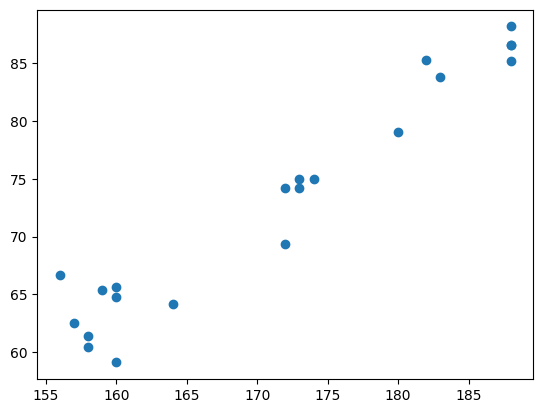

In [13]:
# Now started plotting the graph
# Height is on X-axis & Weight is on Y-axis

import matplotlib.pyplot as plt
plt.scatter(data_sample['height'], data_sample['weight'])

## Hypothesis testing

1. State the null hypothesis H0 and alternative hypothesis HA.
2. Decide on the significance level, α.
3. Compute the value of the test statistic.
4. Determine the p-value.
5. If p≤α, reject H0; otherwise, do not reject H0.
6. Interpret the result of the hypothesis test.

<p>In this case the hypothesis statements are as below<br>
null hypothesis:<br>
H0 = "There is no relation between height and weight, slope is zero."<br>
    This also means that height attribute cannot be used for predicting weight.<br>
alternate hypothesis<br>
H1 = "The height attribute is significant enough to have an effect in predicting weight, slope is non-zero"<br>
    This also means that height is having some relation with weight and can be useful in predicting it.</p>


In [14]:
import numpy as np
from scipy import stats

In [15]:
# We have to calculate slope (beta) here
# For caluclating slope we are using "Co-varience"

In [16]:
data_sample.cov()

,height,weight
height,141.790476,114.571429
weight,114.571429,98.622286


In [24]:
# slope = Beta(m)
weight_mean = np.mean(data_sample["weight"])
height_mean = np.mean(data_sample["height"])

# Beta(m) = Covariance of height and weight/varience of my heigth sample
# slope = m = Beta = lm_beta 

lm_beta = np.cov(data_sample.height, data_sample.weight)[0, 1] / (np.std(data_sample.height, ddof = 1)**2)
lm_beta 

# No need to remeber these formulas
# we can calculate with simple library when we are working on real problems

0.8080333154218162

In [22]:
np.con(data_sample.height, data_sample.weight)[0,1]

AttributeError: module 'numpy' has no attribute 'con'

In [25]:
# As of now we known "y,m" values. So we have to calculate "c"
# y=weight_mean
# m=lm_beta
# y=mx+c

# C=y-mx
lm_alpha = weight_mean - lm_beta * height_mean
lm_alpha

-65.264938205266

In [26]:
# linear model would be 
# mx+c
lm_beta * data_sample['height']+lm_beta

3942    128.477297
4564    140.597797
2285    152.718297
431     152.718297
4894    139.789764
5023    148.678130
6443    128.477297
4042    133.325497
5405    152.718297
6475    152.718297
197     139.789764
7107    126.861231
1644    129.285330
4326    130.093364
2955    141.405830
6912    127.669264
7596    130.093364
5392    147.870097
1296    130.093364
5987    140.597797
3971    146.254030
Name: height, dtype: float64

In [29]:
data_sample['weight']

3942    60.4
4564    74.2
2285    86.6
431     88.2
4894    74.2
5023    83.8
6443    61.4
4042    64.2
5405    85.2
6475    86.6
197     69.4
7107    66.7
1644    65.4
4326    65.6
2955    75.0
6912    62.5
7596    59.1
5392    85.3
1296    64.8
5987    75.0
3971    79.1
Name: weight, dtype: float64

In [28]:
# now go and calculate my "y_hat"

y_hat = lm_alpha + data_sample["height"] * lm_beta 
print(y_hat)
SSE = np.sum((data_sample["weight"] - y_hat) ** 2)

SSE

3942    62.404326
4564    74.524825
2285    86.645325
431     86.645325
4894    73.716792
5023    82.605159
6443    62.404326
4042    67.252526
5405    86.645325
6475    86.645325
197     73.716792
7107    60.788259
1644    63.212359
4326    64.020392
2955    75.332859
6912    61.596292
7596    64.020392
5392    81.797125
1296    64.020392
5987    74.524825
3971    80.181059
Name: height, dtype: float64


120.89508866200948

In [33]:
# we have to calculate the error
# we use sqrt of SSE

se = np.sqrt(SSE / (n - 2))
se

2.5224788211724705

In [34]:
# now calculate "t_value"
t_value = lm_beta / (se / np.sqrt(np.sum((data_sample["height"] - height_mean)**2)))
t_value # this is t statistic value

17.058477500461063

In [37]:
# dof=degree of freedom
# n=no. of samples(21)
#n-2= 21-2= 19
dof = n-2

In [38]:
# once i have 't-value' then i have to calculate 'p-value'
# we use "stats.t.cdf" library
p_value_lower = stats.t.cdf(-np.abs(t_value), dof)
p_value_upper = 1 - stats.t.cdf(t_value, dof)
p_value = p_value_lower + p_value_upper
p_value

5.617848964432106e-13

*p* = 5.61784 X $10^{-13}$

- as the value of p is less than 0.05, there is statistical evidence that the height and weight are related and height can be used as an attribute to predict weight.
- in other words we can say that the means of weight and height are within 95% confidence interval.